In [1]:
sys.path.append('../')

import numpy as np
import pandas as pd

# neural networks
import edward as ed
import tensorflow as tf

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# module loading settings
%load_ext autoreload
%autoreload 2

Size of features in training data: (3750, 1)
Size of output in training data: (3750,)
Size of features in test data: (1250, 1)
Size of output in test data: (1250,)


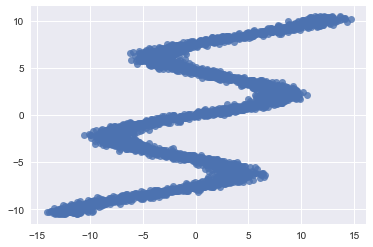

In [2]:
from sklearn.model_selection import train_test_split

def build_toy_dataset(n):
    y_data = np.random.uniform(-10.5, 10.5, n)
    r_data = np.random.normal(size=n)  # random noise
    x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
    x_data = x_data.reshape((n, 1))
    return train_test_split(x_data, y_data, random_state=42)

n_observations = 5000  # number of data points
n_features = 1  # number of features

X_train, X_test, y_train, y_test = build_toy_dataset(n_observations)
print("Size of features in training data: {}".format(X_train.shape))
print("Size of output in training data: {}".format(y_train.shape))
print("Size of features in test data: {}".format(X_test.shape))
print("Size of output in test data: {}".format(y_test.shape))

sns.regplot(X_train, y_train, fit_reg=False);

In [84]:
from src.kmn import KernelMixtureNetwork

kmn = KernelMixtureNetwork()
kmn.fit(X_train, y_train, n_epoch=100, eval_set=(X_test, y_test))

100/100 [100%] ██████████████████████████████ Elapsed: 13s | Loss: 6605.694
Mean log-loss train: 1.762
Mean log-loss test: 1.806
Optimal scales: [ 0.33680758  0.62450504]


KernelMixtureNetwork(center_sampling_method='k_means',
           estimator=<tf.Tensor 'dense_71/Relu:0' shape=(?, 15) dtype=float32>,
           init_scales=array([ 0.1,  1. ]), n_centers=20, n_samples=10)

In [85]:
kmn.partial_fit(X_train, y_train, n_epoch=200, eval_set=(X_test, y_test))

Fitting model
Mean log-loss train: 1.757
Mean log-loss test: 1.800
Optimal scales: [ 0.33494082  0.61604959]


KernelMixtureNetwork(center_sampling_method='k_means',
           estimator=<tf.Tensor 'dense_71/Relu:0' shape=(?, 15) dtype=float32>,
           init_scales=array([ 0.1,  1. ]), n_centers=20, n_samples=10)

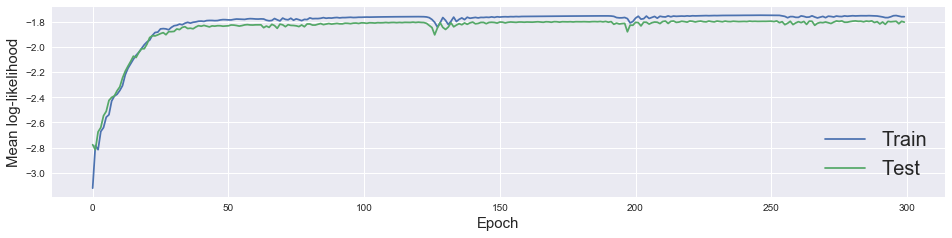

(<matplotlib.figure.Figure at 0x7f9deb31c630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9dd5d83860>)

In [87]:
kmn.plot_loss()

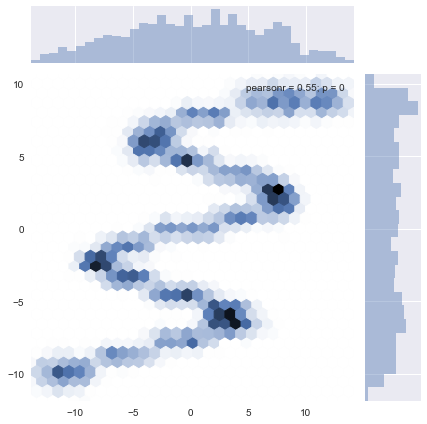

In [88]:
samples = kmn.sample(X_test)
xs = np.tile(X_test.ravel(), kmn.n_samples)
ys = samples.flatten()   
sns.jointplot(xs, ys, kind="hex");

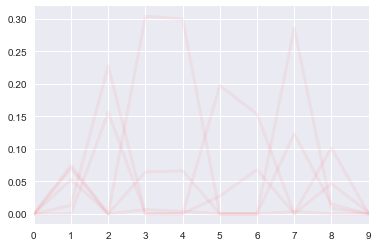

In [89]:
d = kmn.predict_density(X_test[0:5,:].reshape(-1,1), resolution=10)
df = pd.DataFrame(d).transpose()
df.plot(color='red', alpha=0.05, legend=False, linewidth=3);

In [90]:
np.log(kmn.predict(X_train, y_train)).sum()

-6565.376

In [95]:
kmn.score(X_test[0:5,:], y_test[0:5])

-2.0788474

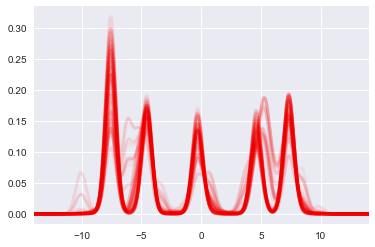

In [22]:
n_grid_points = 1000
y_grid = np.linspace(-14, 14, num=n_grid_points)

X_vals = np.array(np.zeros(100)).reshape(-1,1)

d = sess.run(densities, feed_dict={X_ph: X_vals, y_grid_ph: y_grid})
df = pd.DataFrame(d, index=X_vals.ravel(), columns=y_grid).transpose()
df.plot(color='red', alpha=0.05, legend=False, linewidth=3);